# Classification


## Digits Dataset

## Ingestion

In [0]:
from sklearn import datasets

In [0]:
digits = load_digits()

In [0]:
X = digits.data
y = digits.target

## EDA

In [0]:
display(X.shape)
display(y.shape)

(1797, 64)

(1797,)

In [0]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Modelling

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
def frange(x, y, jump):
  while x <= y:
    yield x
    x += jump

In [0]:
def change_split_percent(x):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =x, random_state=1)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

In [0]:
percentages = list(frange(0.1, 0.95, 0.05))

In [0]:
accuracy = list(map(lambda x: change_split_percent(x), percentages))

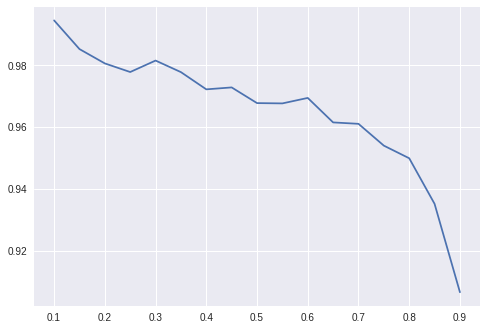

In [0]:
plt.plot(percentages, accuracy)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state=1)

In [0]:
def change_n_estimator(n):
  clf = RandomForestClassifier(n_estimators= n)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

In [0]:
n_est = list(range(100, 1000, 50))

In [0]:
accuracy_n_estimator = list(map(lambda x: change_n_estimator(x), n_est))

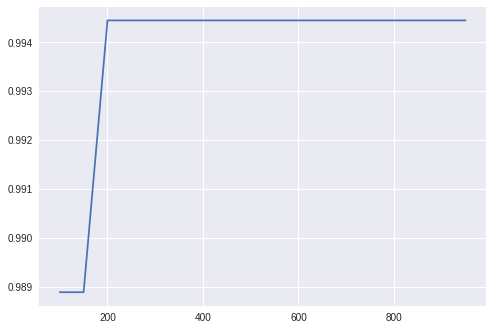

In [0]:
plt.plot(n_est, accuracy_n_estimator)

In [0]:
clf = RandomForestClassifier(n_estimators= 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9944444444444445

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)



[[20  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  1  0  0  0 10]]


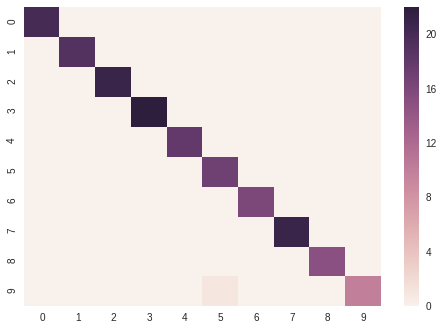

In [0]:
import seaborn as sns
sns.heatmap(conf_mat)

## Conclusion

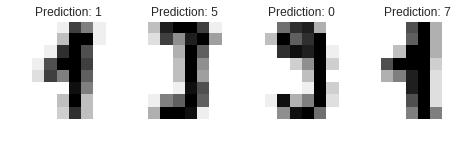

In [0]:
n_samples = len(y_pred)
images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    





*   Random forest does a decent job of classifying the numbers
*   n = 200  is optimum beyond which the accuracy plateaus
* The data should be split into train and test at 90: 10 which leads to highest accuracy

